In [31]:
using Plots
using JLD2
using LaTeXStrings
using Meshfree4ScalarEq.ScalarHyperbolicEquations
using Meshfree4ScalarEq.ParticleGrids
using Meshfree4ScalarEq.TimeIntegration
using Meshfree4ScalarEq.Interpolations
using Meshfree4ScalarEq.SimSettings
using Meshfree4ScalarEq

In [32]:
timeIndex = 9
dataDir = string(@__DIR__, "/data/");
subDirs = filter(entry -> isdir(joinpath(dataDir, entry)), readdir(dataDir));
files = map(entry -> string(dataDir, entry, "/data/step$(timeIndex).jld2"), subDirs);
settings = load(string(dataDir, subDirs[1], "/data/settings.jld2"))["settings"];
labelDict = Dict(
    "MeshfreeUpwind_irgrid_shockInit" => "Upwind: order 1",
    "RK3MOODMUSCL2_irgrid_shockInit" => "MUSCL: order 2",
    "RK3WENO2_irgrid_shockInit" => "WENO: order 2",
    "RK4MOODu2MUSCL4_irgrid_shockInit" => "MUSCL: order 4",
    "MeshfreeUpwind_irgrid_smoothInit1" => "Upwind: order 1",
    "RK3MOODMUSCL2_irgrid_smoothInit1" => "MUSCL: order 2",
    "RK3WENO2_irgrid_smoothInit1" => "WENO: order 2",
    "RK4MOODu2MUSCL4_irgrid_smoothInit1" => "MUSCL: order 4"
);
colorDict = Dict(
    "MeshfreeUpwind_irgrid_shockInit" => :blue,
    "RK3MOODMUSCL2_irgrid_shockInit" => :gold3,
    "RK3WENO2_irgrid_shockInit" => :green,
    "RK4MOODu2MUSCL4_irgrid_shockInit" => :maroon1,
    "MeshfreeUpwind_irgrid_smoothInit1" => :blue,
    "RK3MOODMUSCL2_irgrid_smoothInit1" => :gold3,
    "RK3WENO2_irgrid_smoothInit1" => :green,
    "RK4MOODu2MUSCL4_irgrid_smoothInit1" => :maroon1
);

In [34]:
function shockInit(x::Real)
    return x > -2 ? 1.0 : 0.0
end

boundaryValue = settings.boundaryValue
function shockSolution(x::Real, t::Real)
    if x > (t-2)
        return 1.0
    elseif x < (t-5)
        return boundaryValue
    else 
        return 0.0
    end
end

shockSolution (generic function with 1 method)

Time: 5.0


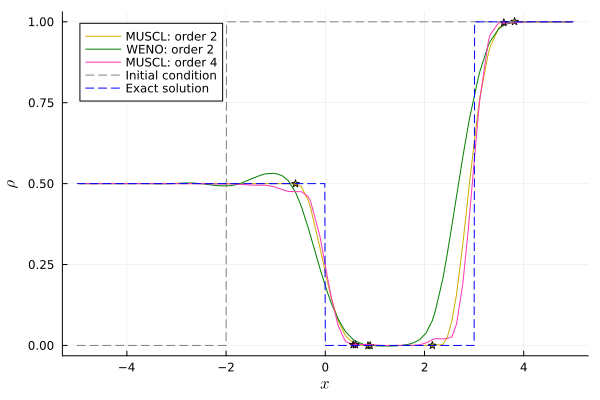

"/home/klaas/Documents/codes/meshfree4hypeq/numericalExperiments/boundaryConditionTest/shockInitBCTest.pdf"

In [35]:
p = plot(xlabel=L"x", ylabel=L"\rho", legend=:topleft)

time = settings.tmax
ms = 4
for file in files
    d = load(file)
    time = d["time"]
    particleGrid = d["particleGrid"]
    rhos = map(particle -> particle.rho, particleGrid.grid)
    pos = map(particle -> particle.pos, particleGrid.grid)
    label = labelDict[splitext(basename(dirname(dirname(file))))[1]]
    color = colorDict[splitext(basename(dirname(dirname(file))))[1]]
    if contains(splitext(basename(dirname(dirname(file))))[1], "shockInit")
        plot!(p, pos, rhos, label=label, c=color)
        plot!(p, [pos[i] for i in eachindex(pos) if particleGrid.grid[i].moodEvent], [rhos[i] for i in eachindex(pos) if particleGrid.grid[i].moodEvent], label="", markershape=:star5, lt=:scatter, c=color, ms=ms)

    end
end
println("Time: ", time)

# Plot initial condition and exact solution
xrange = -5.0:0.01:5.0
initialCondition = map(x -> shockInit(x), xrange)
exactSolution = map(x -> shockSolution(x, time), xrange)
plot!(p, xrange, initialCondition, label="Initial condition", c=:grey, ls=:dash)
plot!(p, xrange, exactSolution, label="Exact solution", c=:blue, ls=:dash)

display(p)
savefig(p, "shockInitBCTest.pdf")